<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/sex_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import seaborn as sns
import pandas as pd
import math
from scipy import stats
import pingouin as pg
import scipy as sp
import scikit_posthocs
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
body = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/koreaverage.xlsx")

In [62]:
print(body.columns)

Index(['ⓞ_02_성별', 'ⓞ_06_나이_반올림', 'ⓞ_12_골격근량', 'ⓞ_13_체지방량', 'ⓞ_14_체수분',
       'ⓞ_15_단백질', 'ⓞ_16_무기질', 'ⓞ_17_BMI', 'ⓞ_18_체지방율', 'ⓞ_19_복부지방율',
       ...
       '①_124_무릎아래둘레', '①_125_장딴지둘레', '①_126_종아리최소둘레', '①_127_발목최대둘레',
       '①_128_발목너비', '①_129_발뒤꿈치너비', '①_130_위팔둘레', '①_131_팔꿈치둘레', '①_132_손목둘레',
       '①_133_머리위로뻗은주먹높이'],
      dtype='object', length=148)


In [63]:
#열이름 
num=[]
for i in body:
  num.append(i)
  print(i)

ⓞ_02_성별
ⓞ_06_나이_반올림
ⓞ_12_골격근량
ⓞ_13_체지방량
ⓞ_14_체수분
ⓞ_15_단백질
ⓞ_16_무기질
ⓞ_17_BMI
ⓞ_18_체지방율
ⓞ_19_복부지방율
ⓞ_20_복부지방율평가
ⓞ_21_기초대사량
ⓞ_22_기초대사량평가
ⓞ_23_근육조절
ⓞ_24_지방조절
①_001_오른쪽어깨경사각
①_002_왼쪽어깨경사각
①_003_키
①_004_눈높이
①_005_목뒤높이
①_006_어깨높이
①_007_어깨가쪽높이
①_008_겨드랑높이
①_009_굽힌팔꿈치높이
①_010_허리기준선높이
①_011_엉덩이높이
①_012_주먹높이
①_013_허리높이
①_014_배꼽수준허리높이
①_015_위앞엉덩뼈가시높이
①_016_무릎높이
①_017_샅높이
①_018_가슴너비
①_019_젖가슴너비
①_020_허리너비
①_021_배꼽수준허리너비
①_022_엉덩이너비
①_023_겨드랑두께
①_024_가슴두께
①_025_젖가슴두께
①_026_허리두께
①_027_배꼽수준허리두께
①_028_엉덩이두께
①_029_몸통수직길이
①_030_엉덩이수직길이
①_031_몸무게
①_032_앞중심길이
①_033_배꼽수준앞중심길이
①_034_겨드랑앞벽사이길이
①_035_겨드랑앞접힘사이길이
①_036_젖꼭지사이수평길이_여
①_037_목둘레
①_038_목밑둘레
①_039_가슴둘레
①_040_젖가슴둘레
①_041_젖가슴아래둘레_여
①_042_허리둘레
①_043_배꼽수준허리둘레
①_044_배둘레
①_045_엉덩이둘레
①_046_배돌출점기준엉덩이둘레
①_047_어깨길이
①_048_목뒤등뼈위겨드랑수준길이
①_049_등길이
①_050_배꼽수준등길이
①_051_목뒤오금길이
①_052_총길이
①_053_넙다리직선길이
①_054_어깨사이길이
①_055_어깨가쪽사이길이
①_056_겨드랑뒤벽사이길이
①_057_겨드랑뒤벽접힘사이길이
①_058_목뒤젖꼭지길이
①_059_목뒤젖꼭지허리둘레선길이
①_060_목옆젖꼭지길이_여_
①_061_목옆허리둘레선길이
①_062_목옆어깨뼈아래허리둘레선길이
①_063_위팔길이
①_064_팔길이
①

In [64]:
#남성결측값 변수 제거 
df=body.drop(["①_036_젖꼭지사이수평길이_여","①_038_목밑둘레","①_041_젖가슴아래둘레_여","①_060_목옆젖꼭지길이_여_" ,"①_116_얼굴너비","①_117_아래턱사이너비"], axis=1)

In [65]:
#결측값 제거
df.dropna(axis=0, inplace=True)

In [66]:
#결측값 개수 확인
df.isnull().sum()

ⓞ_02_성별             0
ⓞ_06_나이_반올림         0
ⓞ_12_골격근량           0
ⓞ_13_체지방량           0
ⓞ_14_체수분            0
                   ..
①_129_발뒤꿈치너비        0
①_130_위팔둘레          0
①_131_팔꿈치둘레         0
①_132_손목둘레          0
①_133_머리위로뻗은주먹높이    0
Length: 142, dtype: int64

In [67]:
df= df.replace("남", 0).replace("여", 1)

In [110]:
df["ⓞ_02_성별"]

0       0
1       0
2       0
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    1
Name: ⓞ_02_성별, Length: 6341, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

In [111]:
#연속형 변수와 범주형 변수 분류해주기
num = df.drop(["ⓞ_02_성별", "ⓞ_20_복부지방율평가", "ⓞ_22_기초대사량평가"], axis=1)
num_list = num.columns
cg = ["ⓞ_20_복부지방율평가", "ⓞ_22_기초대사량평가"]

#df 검색시 index에 list를 넣어주어야 함으로 num_list(dtype: object)를 list로 전환해줬다.

num=[]
for i in num_list:
  num.append(i)


#분할
X = df[num+cg]
Y = df["ⓞ_02_성별"]


#train testt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫코딩(더미변수화)
ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)


#오버샘플링
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))

original data Counter({1: 3181, 0: 3160})
original train data Counter({0: 2230, 1: 2230})


In [121]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print("accuracy : {:3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

#accuracy : 0.9721

accuracy : 0.972197
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       952
           1       0.96      0.96      0.96       951

    accuracy                           0.96      1903
   macro avg       0.96      0.96      0.96      1903
weighted avg       0.96      0.96      0.96      1903



In [132]:
feature_name = X.columns
feature_importance = sorted(DT_model.feature_importances_, reverse = True)
#성별예측에 영향력이 큰 변수는 골격근량, 체지방율, 목둘레, 근육조절, 어깨가쪽사이길이, 허리높이를 알 수 있다.


In [135]:
feature_name1 = X.columns[:10]
feature_importance1 = feature_importance[:10]
feature_importance1

[0.8534583607273784,
 0.09127100076939691,
 0.01927969784331667,
 0.013992722238444373,
 0.01244046899558548,
 0.00955774942587829,
 0.0,
 0.0,
 0.0,
 0.0]

In [136]:
trace= go.Scatter(
    y= feature_importance1,
    x= feature_name1,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = feature_importance,
        colorscale='Portland',
        showscale = True
    ),
    text = feature_name
)
data = [trace]

layout = go.Layout(
    autosize = True, 
    title = 'DecisionTree Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False, 
        zeroline = False, 
        showline = False,
    ),
    yaxis=dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tis

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances)
plt.title('DecisionTree Feature Importances', fontsize=18)
plt.show()

In [72]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


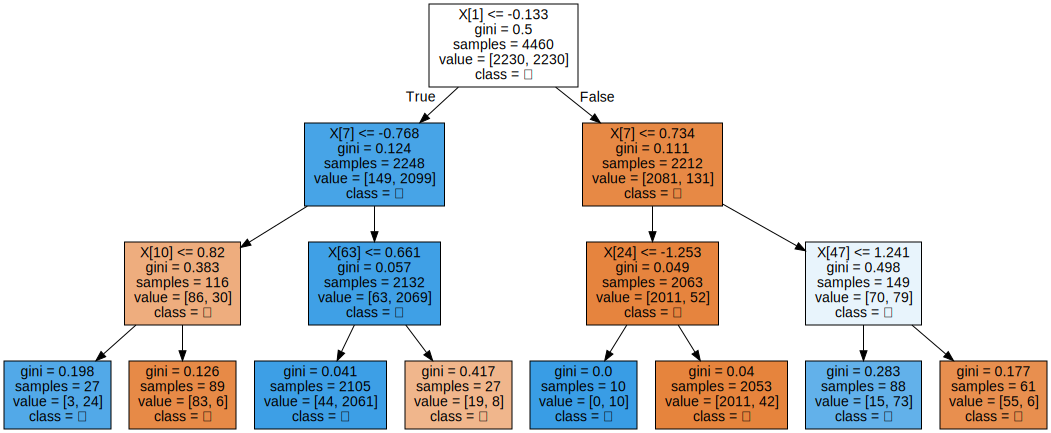

In [93]:
from sklearn.tree import export_graphviz
import graphviz


export_graphviz(DT_model, out_file = "tree.dot", class_names=["남","여"],
                impurity = True, filled=True)

#파일열기
with open("tree.dot", encoding = "utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#X[1] : 골격근량
#X[7] : 체지방률
#X[10] : 근육조절
#X[63] : 어깨가쪽사이길이
#X[24] : 허리높이
#X[47] : 목둘레